# Análise do Comportamento de Compra de Consumidores


### Análise dos consumidores (quantidade, faixa etária, gênero, consumidores que mais compraram)
### Análise das compras (quantidade, valor total, itens exclusivos)
### Análise das compras por gênero (porcentagem de cada gênero)
### Análise dos itens ( mais populares, mais lucrativos)

In [1]:
#Primeiro, importamos as bibliotécas necessárias para manipulação do arquivo com os dados

import pandas as pd
import numpy as np

In [2]:
#Lendo o arquivo json
load_file = "dados_compras.json"
file = pd.read_json(load_file, orient="records")
file.head()


,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


## 1. Consumidores
### Contagem total de consumidores

In [3]:
users = file.loc[:,["Login", "Idade", "Sexo"]]   # ":" seleciona todas as rows e depois selecionamos as colunas que queremos
users.head()

,Login,Idade,Sexo
0,Aelalis34,38,Masculino
1,Eolo46,21,Masculino
2,Assastnya25,34,Masculino
3,Pheusrical25,21,Masculino
4,Aela59,23,Masculino


In [4]:
#Limpando os dados
users =users.drop_duplicates()
users_count = users.count()[0]
users_count

573

# 2. Análise Geral das Compras
#### Número de itens exclusivos
#### Preço médio de compra
#### Número total de compras
#### Rendimento total

## Número de Itens exclusivos


In [5]:
all_buys = file.loc[:,["Item ID", "Nome do Item", "Valor"]]
all_buys.head()

,Item ID,Nome do Item,Valor
0,165,Bone Crushing Silver Skewer,3.37
1,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,174,Primitive Blade,2.46
3,92,Final Critic,1.36
4,63,Stormfury Mace,1.27


In [6]:
#Retirando os ID's duplicados para contagem de itens exclusivos
exclusive_items = all_buys.drop_duplicates(subset=["Item ID"])
exclusive_items_count = exclusive_items.count()[0]
print("O número de itens exclusivos é", exclusive_items_count)

O número de itens exclusivos é 183


## Número Total de Compras

In [7]:
total_count_buys = all_buys.count()[0]
total_count_buys

780

## Preço médio de compra

In [8]:
total_value_buys = all_buys["Valor"].sum()
print("O valor total das compras: ", round(total_value_buys,2))
mean_price_shopping = all_buys["Valor"].mean()
print("O preço médio de compra: ", round(mean_price_shopping, 2))

O valor total das compras:  2286.33
O preço médio de compra:  2.93


In [9]:
summary_shopping = pd.DataFrame({"Número de Itens Exclusivos" : [exclusive_items_count],
                                "Número de Compras" : [total_count_buys],
                                "Preço médio de Compra" : [round(mean_price_shopping,2)],
                                "Valor Total de Compras" : [total_value_buys]})
summary_shopping

,Número de Itens Exclusivos,Número de Compras,Preço médio de Compra,Valor Total de Compras
0,183,780,2.93,2286.33




# 3.  Informações Demográficas Por Gênero
### Porcentagem e contagem de compradores masculinos
### Porcentagem e contagem de compradores do sexo feminino
### Porcentagem e contagem de outros / não divulgados

In [10]:
all_buyers = file.loc[:,["Login", "Sexo"]].drop_duplicates()
all_buyers = all_buyers.groupby("Sexo").count()
all_buyers.columns = ['Contagem']
total_buyers = all_buyers["Contagem"].sum()
all_buyers


,Contagem
Sexo,
Feminino,100
Masculino,465
Outro / Não Divulgado,8


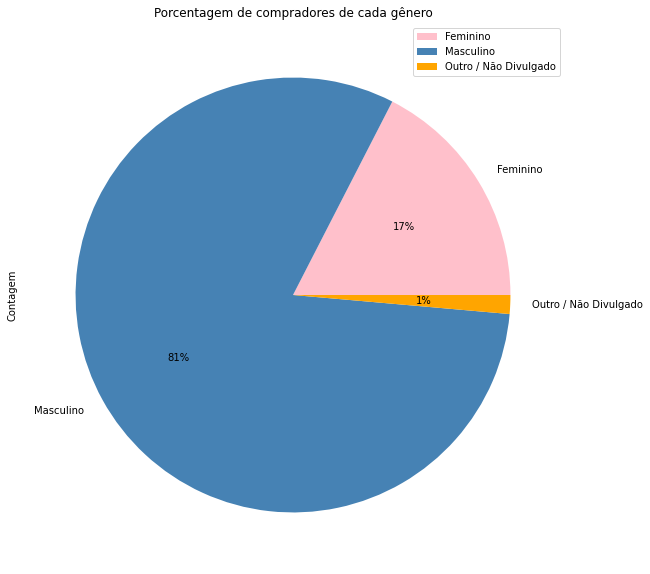

In [11]:
fig = all_buyers.plot(kind='pie', y="Contagem", autopct='%1.0f%%', title = "Porcentagem de compradores de cada gênero", 
                      figsize=(10,10), colors = ['pink', 'steelblue', 'orange'])

# 4. Análise de compras por gênero
#### Número de compras
#### Preço médio de compra
#### Valor Total de Compra
#### Compras for faixa etária

In [22]:
gender_total_price = file.groupby(["Sexo"]).sum()["Valor"].rename("Valor Total de Compra")  
gender_mean_price = file.groupby(["Sexo"]).mean()["Valor"].rename("Preço médio de Compra")  
gender_total_buys = file.groupby(["Sexo"]).count()["Valor"].rename("Número de Compras")

summary_gender = pd.DataFrame({"Valor total de Compra" : gender_total_price,
                             "Preço médio de Compra" : gender_mean_price,
                             "Número de Compras" : gender_total_buys})


#Data munging

summary_gender["Preço médio de Compra"] = summary_gender["Preço médio de Compra"].map("${:,.2f}".format)
summary_gender["Valor total de Compra"] = summary_gender["Valor total de Compra"].map("${:,.2f}".format)


summary_gender

,Valor total de Compra,Preço médio de Compra,Número de Compras
Sexo,,,
Feminino,$382.91,$2.82,136
Masculino,"$1,867.68",$2.95,633
Outro / Não Divulgado,$35.74,$3.25,11


In [23]:
#Compras por cada idade 
purchases_per_age = file.loc[:,["Login", "Idade"]].drop_duplicates()
purchases_per_age = purchases_per_age.groupby(["Idade"]).count()
purchases_per_age.columns = ["Compras por faixa etária"]
purchases_per_age.head()

,Compras por faixa etária
Idade,
7,11
8,2
9,6
10,3
11,5


In [24]:
#Compras por cada FAIXA etária, junto com a média, porcentagem e valor total.
age_bins = [0, 9.99, 14.99, 19.99, 24.99, 29.99, 34.99, 39.99, 99.99]
age_brackets = ["Menos de 10", "10 a 14", "15 a 19", "20 a 24", "25 a 29", "30 a 34", "35 a 39", "Mais de 40"]

file["Range de Idades"] = pd.cut(file["Idade"], age_bins, labels=age_brackets)  #putting category in each age
age_count = file["Range de Idades"].value_counts()
age_mean_price = file.groupby(["Range de Idades"]).mean()["Valor"]
age_total_price = file.groupby(["Range de Idades"]).sum()["Valor"]
age_percent = (age_count / total_buyers ) * 100

summary_age = pd.DataFrame({"Contagem" : age_count, "Porcentagem %" : age_percent, "Média de Compra" : age_mean_price,
                           "Valor total de compras" : age_total_price})

summary_age = summary_age.round(2)

#Data Munging
summary_age['Média de Compra'] = summary_age['Média de Compra'].map('${:,.2f}'.format)
summary_age




,Contagem,Porcentagem %,Média de Compra,Valor total de compras
Menos de 10,28,4.89,$2.98,83.46
10 a 14,35,6.11,$2.77,96.95
15 a 19,133,23.21,$2.91,386.42
20 a 24,336,58.64,$2.91,978.77
25 a 29,125,21.82,$2.96,370.33
30 a 34,64,11.17,$3.08,197.25
35 a 39,42,7.33,$2.84,119.40
Mais de 40,17,2.97,$3.16,53.75


# 5. Principais Compradores e Itens



In [44]:
users_buys_number = file.groupby(["Login"]).count()["Valor"].rename("N de compras")
users_mean_price = file.groupby(["Login"]).mean()['Valor'].rename("Preço médio de compra")
users_total_price = file.groupby(["Login"]).sum()["Valor"].rename("Valor total de Compra")

summary_users = pd.DataFrame({"Número de compras" : users_buys_number,
                             "Preço médio de compra" : users_mean_price,
                             "Valor total de Compras" : users_total_price})

#Data Munging

# Top 5 compradores pelo número de compras
summary_users["Preço médio de compra"] = summary_users["Preço médio de compra"].map("${:,.2f}".format)
ranking_users= summary_users.sort_values(by="Valor total de Compras", ascending=False)
top5_users = ranking_users.head(5)
top5_users

,Número de compras,Preço médio de compra,Valor total de Compras
Login,,,
Undirrala66,5,$3.41,17.06
Saedue76,4,$3.39,13.56
Mindimnya67,4,$3.19,12.74
Haellysu29,3,$4.24,12.73
Eoda93,3,$3.86,11.58


In [56]:

items_count = file.groupby(["Nome do Item"]).count()["Valor"].rename("N de Compras")
items_mean = file.groupby(["Nome do Item"]).mean()["Valor"].rename("Preço médio de Compras")
items_sum = file.groupby(["Nome do Item"]).sum()["Valor"].rename("Valor total de Compras")

summary_items = pd.DataFrame({"Número de Compras" :  items_count,
                             "Preço médio de Compras" : items_mean,
                             "Valor total de Compras" : items_sum})

summary_items

# 5 itens mais populares por número de compras

top5_items =summary_items.sort_values(by="Número de Compras", ascending=False).head(10)
top5_items['Preço médio de Compras'] = top5_items['Preço médio de Compras'].map("${:,.2f}".format)
top5_items['Valor total de Compras'] = top5_items['Valor total de Compras'].map("${:,.2f}".format)
top5_items



,Número de Compras,Preço médio de Compras,Valor total de Compras
Nome do Item,,,
Final Critic,14,$2.76,$38.60
Arcane Gem,11,$2.23,$24.53
"Betrayal, Whisper of Grieving Widows",11,$2.35,$25.85
Stormcaller,10,$3.47,$34.65
Woeful Adamantite Claymore,9,$1.24,$11.16
Serenity,9,$1.49,$13.41
Trickster,9,$2.07,$18.63
Retribution Axe,9,$4.14,$37.26
"Splitter, Foe Of Subtlety",8,$3.61,$28.88


In [58]:
#5 items mais lucrativos pelo valor total de compras

top5_items_lucrative = summary_items.sort_values(by="Valor total de Compras", ascending=False).head(10)
top5_items_lucrative

,Número de Compras,Preço médio de Compras,Valor total de Compras
Nome do Item,,,
Final Critic,14,2.757143,38.60
Retribution Axe,9,4.140000,37.26
Stormcaller,10,3.465000,34.65
Spectral Diamond Doomblade,7,4.250000,29.75
Orenmir,6,4.950000,29.70
Singed Scalpel,6,4.870000,29.22
"Splitter, Foe Of Subtlety",8,3.610000,28.88
"Thorn, Satchel of Dark Souls",6,4.510000,27.06
Fiery Glass Crusader,6,4.450000,26.70


# Feito por Daniel Guedes
### https://github.com/guedesdaniel